<a href="https://colab.research.google.com/github/ELCRISHT/The-Nuclei---Project-01/blob/main/Classifier_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree


stroke_data = pd.read_csv('stroke.csv')
df = pd.DataFrame(stroke_data)

In [ ]:
df = df.dropna()
df = df[df['smoking_status'] != 'Unknown']
df = df[df['bmi'] != 'N/A']

print(df.head())
print(df.dtypes)
print(df.count())
print(df.shape)
print(df.describe())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1  
id                     int64
gender                objec

In [ ]:
df = df.drop(['id'], axis=1)
df = df.dropna()

In [ ]:
categorical_columns = ['gender', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
print(categorical_columns)
numerical_columns = df.select_dtypes(include=[np.float64, np.int64]).columns
print(numerical_columns)

['gender', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


In [ ]:
impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical = OneHotEncoder(handle_unknown='ignore')
scaler_numerical = StandardScaler()

Creating Pipelines to Apply Transformation (Categorical)




In [ ]:
categorical_transformer = Pipeline(steps=[
    ('impute', impute_categorical),
    ('onehot', onehot_categorical)
])

Create Pipelines to Apply Transformation (Numerical)

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scale', scaler_numerical)
])

Combine.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ],
    remainder="passthrough"
)

Data after transformed.

In [ ]:
df_transformed = preprocessor.fit_transform(df)
print("Data after transforming:")
print(df_transformed)

Data after transforming:
[[ 0.          1.          0.         ...  2.52362148  0.86498222
   4.24656724]
 [ 0.          1.          0.         ... -0.05035773  0.30294524
   4.24656724]
 [ 1.          0.          0.         ...  1.31892289  0.5634014
   4.24656724]
 ...
 [ 1.          0.          0.         ...  0.35386414  1.33106167
  -0.23548432]
 [ 1.          0.          0.         ... -0.53110501  0.04248908
  -0.23548432]
 [ 0.          1.          0.         ...  1.21535152 -0.64292188
  -0.23548432]]


In [ ]:
transformed_df = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())
print(transformed_df.head())

   cat__gender_Female  cat__gender_Male  cat__gender_Other  \
0                 0.0               1.0                0.0   
1                 0.0               1.0                0.0   
2                 1.0               0.0                0.0   
3                 1.0               0.0                0.0   
4                 0.0               1.0                0.0   

   cat__heart_disease_0  cat__heart_disease_1  cat__ever_married_No  \
0                   0.0                   1.0                   0.0   
1                   0.0                   1.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   1.0                   0.0                   0.0   
4                   1.0                   0.0                   0.0   

   cat__ever_married_Yes  cat__work_type_Govt_job  \
0                    1.0                      0.0   
1                    1.0                      0.0   
2                    1.0                 

In [ ]:
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(df['stroke'])
print("Encoded value of stroke after applying label encoder:")
print(label)

Encoded value of stroke after applying label encoder:
[1 1 1 ... 0 0 0]


In [ ]:
features = df.drop(['stroke'], axis=1)
label = df['stroke']

In [ ]:
df_transformed = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())
df_transformed['stroke'] = label

In [ ]:
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  


Shape[0] - Number of **Rows**

In [ ]:
stroke_dim = df.shape[0]
print(stroke_dim)

3426


Shape[1] - Number of **Columns**


In [ ]:
stroke_dim = df.shape[1]
print(stroke_dim)

11


In [ ]:
x = df.loc[:,'age':'stroke']
y = df.loc[:,'stroke']

print(x.head())
print(y.head())

    age  hypertension  heart_disease ever_married      work_type  \
0  67.0             0              1          Yes        Private   
2  80.0             0              1          Yes        Private   
3  49.0             0              0          Yes        Private   
4  79.0             1              0          Yes  Self-employed   
5  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  
0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64


In [ ]:
model = DummyClassifier(strategy='most_frequent')
model.fit(x, y)
model.predict(x)

accuracy = round(model.score(x, y), 2)
print(accuracy)

0.95


In [ ]:
model = DummyClassifier(strategy='stratified')
model.fit(x, y)
model.predict(x)

accuracy = round(model.score(x, y), 2)
print(accuracy)

0.9


In [ ]:
model = DummyClassifier(strategy='uniform')
model.fit(x, y)
model.predict(x)

accuracy = round(model.score(x, y), 2)
print(accuracy)

0.49


In [ ]:
model = DummyClassifier(strategy='constant', constant = 0)
model.fit(x, y)
model.predict(x)

accuracy = round(model.score(x, y), 2)
print(accuracy)

0.95


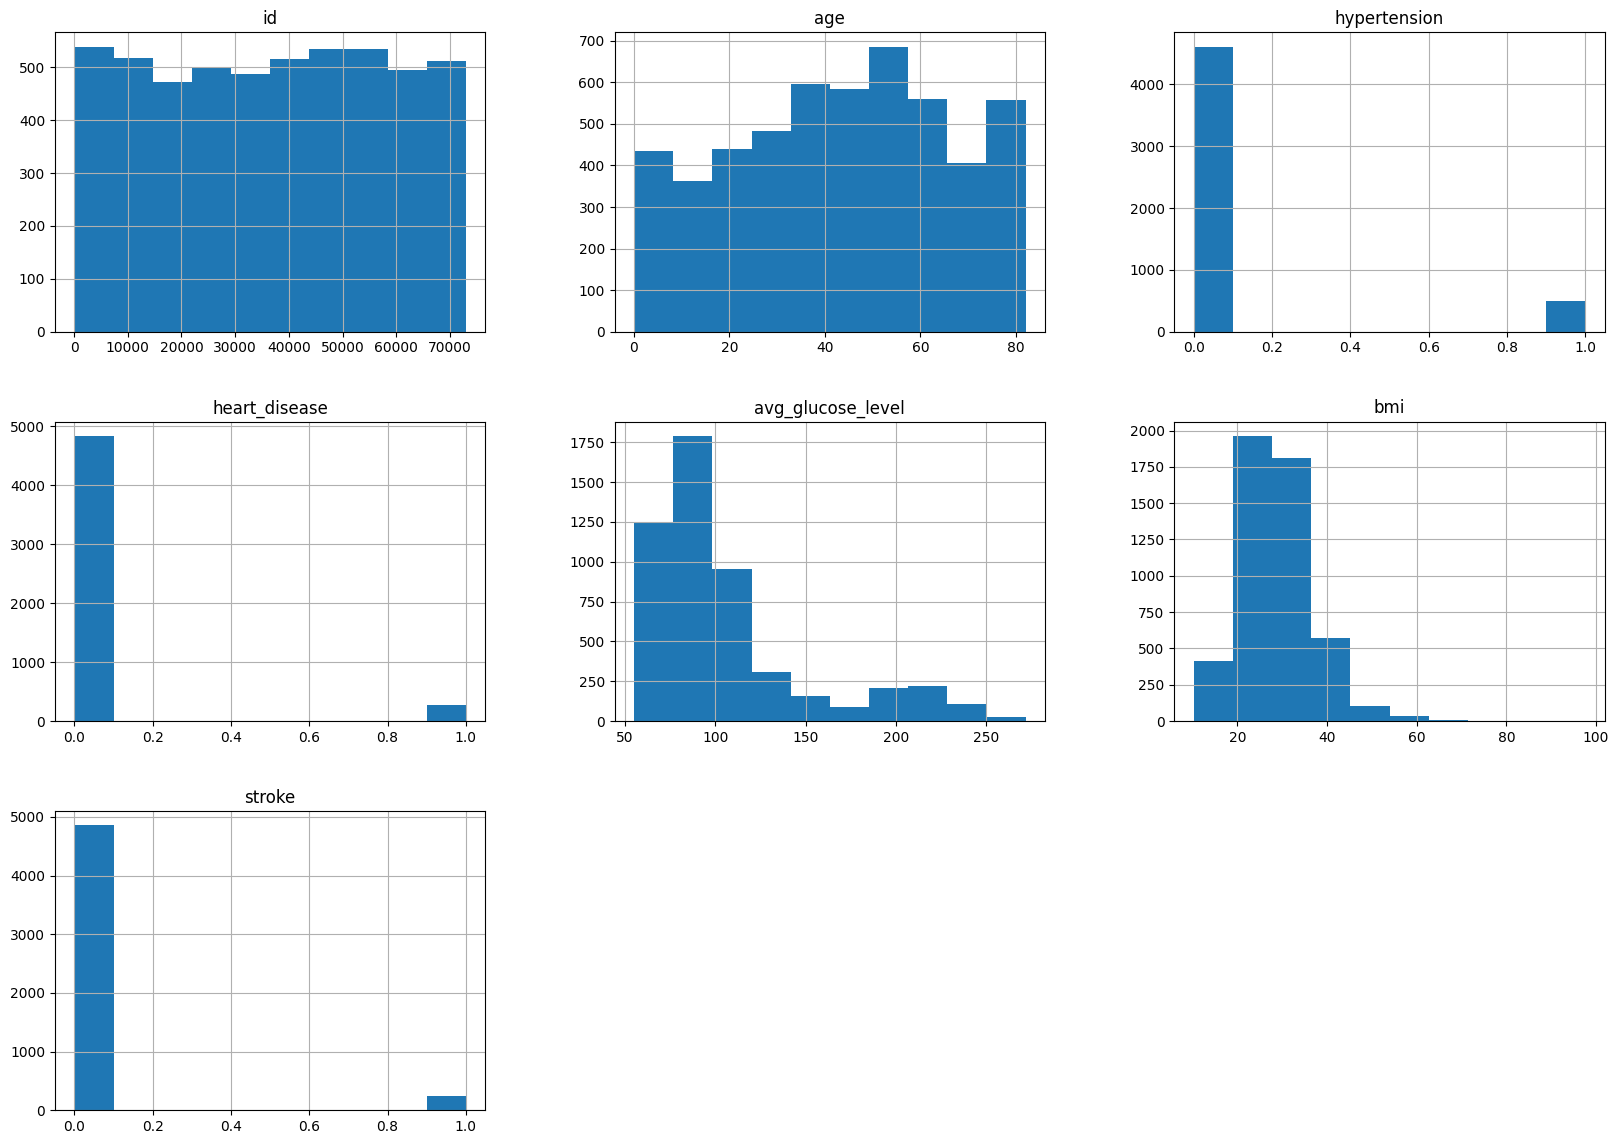

In [ ]:
stroke_data = pd.read_csv("stroke.csv")
_ = stroke_data.hist(figsize=(20, 14))
stroke_data['avg_glucose_level'].value_counts().plot(kind='bar')
plt.show()

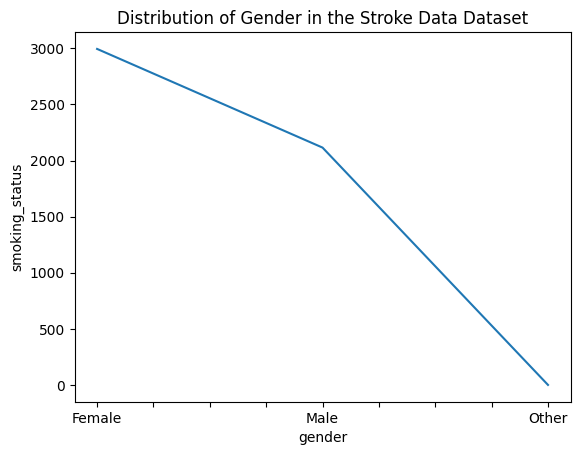

In [ ]:
stroke_data  = pd.read_csv("stroke.csv")
stroke_data["gender"].value_counts().plot(kind="line")
plt.xlabel("gender")
plt.ylabel("smoking_status")
plt.title("Distribution of Gender in the Stroke Data Dataset")
plt.show()


In [ ]:
pd.crosstab(
    index=stroke_data["gender"],
    columns=stroke_data["smoking_status"]
)


smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,836,477,1229,452
Male,708,407,663,337
Other,0,1,0,0


In [ ]:
X = stroke_data[["heart_disease"]]
y = stroke_data["stroke"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


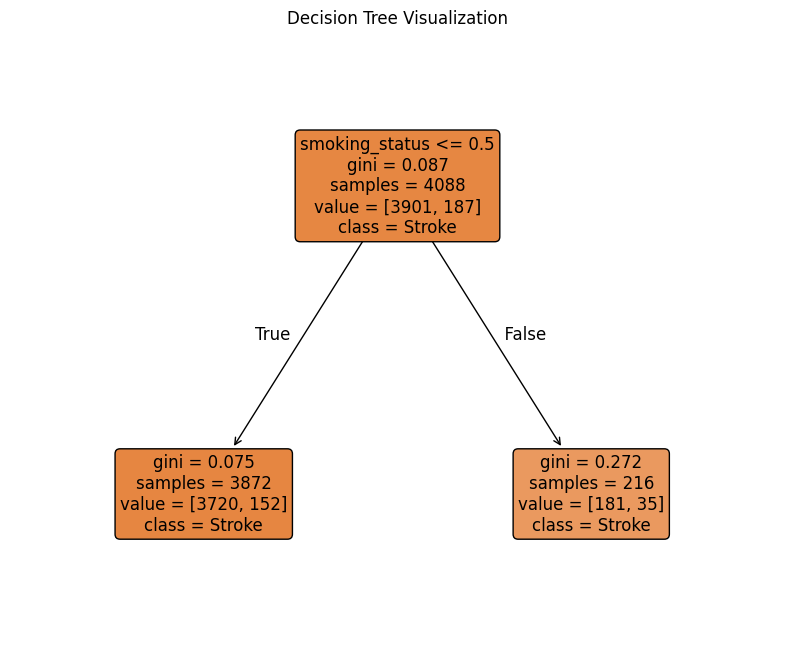

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(model,
          feature_names=["smoking_status"],
          class_names=["Stroke"],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()